In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Dataset for the code

In [659]:
df = pd.read_csv('grapes_new.csv')

In [660]:
df

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,...,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE,CLASS
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean,High
1,112.57,elliptical,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,...,1.05,1050,23.40,51.91,31.28,99.05,7.66,48.18,archean,High
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean,High
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial,High
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,102.34,elliptical,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,...,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,alluvial,Medium
190,109.80,elliptical,21.67,12.43,1.53,2.29,NaN,86,2.74,3.15,...,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,archean,Medium
191,103.86,round,22.01,11.79,2.13,2.78,28.5,92,2.13,2.24,...,0.97,466,27.62,48.98,30.46,86.31,7.57,47.57,archean,Medium
192,98.30,elliptical,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,...,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,alluvial,Medium


# Seperating X and Y

In [662]:
df.columns

Index(['COLOR_INTENSITY', 'SHAPE', 'RIPENESS_PER', 'ALCOHOL_PER',
       'MALIC_ACID_PER', 'ASH', 'ALCALINITY_OF_ASH', 'MAGNESIUM_MEASURE',
       'TOTAL_PHENOLS', 'FLAVANOIDS', 'PROANTHOCYANINS', 'HUE', 'PROLINE',
       'TEMPERATURE', 'AVG_HUMIDITY', 'FERT_NITRO_PER', 'WATER_O2_PER',
       'WATER_PH', 'FER_P2O5_PER', 'SOIL_TYPE', 'CLASS'],
      dtype='object')

In [663]:
df.columns = df.columns.str.lower()

In [664]:
df.columns

Index(['color_intensity', 'shape', 'ripeness_per', 'alcohol_per',
       'malic_acid_per', 'ash', 'alcalinity_of_ash', 'magnesium_measure',
       'total_phenols', 'flavanoids', 'proanthocyanins', 'hue', 'proline',
       'temperature', 'avg_humidity', 'fert_nitro_per', 'water_o2_per',
       'water_ph', 'fer_p2o5_per', 'soil_type', 'class'],
      dtype='object')

In [665]:
x = df.drop(columns=['class'])
y = df['class']


In [666]:
# Fill NaN values with the median of the respective columns
x = x.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col.fillna(col.mode()[0]), axis=0)

# Verify if there are still any NaN values
print(X.isnull().sum())


color_intensity       0
ripeness_per          2
alcohol_per           3
malic_acid_per        0
ash                   0
alcalinity_of_ash     6
magnesium_measure     0
total_phenols         0
flavanoids            0
proanthocyanins       0
hue                   2
proline               0
temperature           0
avg_humidity          0
fert_nitro_per        0
water_o2_per          4
water_ph              0
fer_p2o5_per          0
shape_elliptical      0
shape_round           0
soil_type_alluvial    0
soil_type_archean     0
dtype: int64


In [667]:
# Verify if there are still any NaN values
print(X.isnull().sum())

color_intensity       0
ripeness_per          2
alcohol_per           3
malic_acid_per        0
ash                   0
alcalinity_of_ash     6
magnesium_measure     0
total_phenols         0
flavanoids            0
proanthocyanins       0
hue                   2
proline               0
temperature           0
avg_humidity          0
fert_nitro_per        0
water_o2_per          4
water_ph              0
fer_p2o5_per          0
shape_elliptical      0
shape_round           0
soil_type_alluvial    0
soil_type_archean     0
dtype: int64


In [668]:
df['soil_type'].value_counts()

soil_type
archean     104
alluvial     90
Name: count, dtype: int64

In [669]:
df['class'].value_counts()

class
Medium    76
High      64
Low       54
Name: count, dtype: int64

In [670]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   color_intensity    194 non-null    float64
 1   shape              194 non-null    object 
 2   ripeness_per       192 non-null    float64
 3   alcohol_per        191 non-null    float64
 4   malic_acid_per     194 non-null    float64
 5   ash                194 non-null    float64
 6   alcalinity_of_ash  188 non-null    float64
 7   magnesium_measure  194 non-null    int64  
 8   total_phenols      194 non-null    float64
 9   flavanoids         194 non-null    float64
 10  proanthocyanins    194 non-null    float64
 11  hue                192 non-null    float64
 12  proline            194 non-null    int64  
 13  temperature        194 non-null    float64
 14  avg_humidity       194 non-null    float64
 15  fert_nitro_per     194 non-null    float64
 16  water_o2_per       190 non

In [671]:
df.describe()

,color_intensity,ripeness_per,alcohol_per,malic_acid_per,ash,alcalinity_of_ash,magnesium_measure,total_phenols,flavanoids,proanthocyanins,hue,proline,temperature,avg_humidity,fert_nitro_per,water_o2_per,water_ph,fer_p2o5_per
count,194.000000,192.000000,191.000000,194.000000,194.000000,188.000000,194.000000,194.000000,194.000000,194.000000,192.000000,194.000000,194.000000,194.000000,194.000000,190.000000,194.000000,194.000000
mean,116.882113,21.512604,13.024241,2.335103,2.365361,19.485106,99.680412,2.296649,2.016856,1.577216,0.955740,754.164948,26.418247,50.976082,30.562216,90.178000,7.680979,42.195155
std,14.333204,2.386562,0.809621,1.118041,0.268158,3.434971,14.252749,0.634317,1.001351,0.565445,0.228217,316.093797,3.042364,3.367880,1.126867,5.364122,0.509935,10.398205
min,93.000000,16.170000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.410000,0.480000,278.000000,21.020000,44.230000,27.670000,80.360000,6.510000,20.000000
25%,105.470000,20.315000,12.370000,1.610000,2.210000,17.075000,88.000000,1.725000,1.092500,1.225000,0.787500,504.000000,24.222500,48.360000,29.932500,85.685000,7.252500,33.742500
50%,114.910000,21.820000,13.050000,1.865000,2.360000,19.500000,97.500000,2.355000,2.135000,1.545000,0.975000,675.000000,26.195000,51.145000,30.710000,90.160000,7.670000,44.820000
75%,124.060000,23.345000,13.685000,3.082500,2.547500,21.500000,107.000000,2.800000,2.875000,1.950000,1.112500,988.750000,28.737500,53.722500,31.382500,94.445000,8.127500,50.542500
max,167.000000,25.200000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,3.580000,1.710000,1680.000000,32.340000,57.950000,34.160000,99.770000,8.500000,60.870000


In [672]:
df

,color_intensity,shape,ripeness_per,alcohol_per,malic_acid_per,ash,alcalinity_of_ash,magnesium_measure,total_phenols,flavanoids,...,hue,proline,temperature,avg_humidity,fert_nitro_per,water_o2_per,water_ph,fer_p2o5_per,soil_type,class
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean,High
1,112.57,elliptical,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,...,1.05,1050,23.40,51.91,31.28,99.05,7.66,48.18,archean,High
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean,High
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial,High
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,102.34,elliptical,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,...,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,alluvial,Medium
190,109.80,elliptical,21.67,12.43,1.53,2.29,NaN,86,2.74,3.15,...,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,archean,Medium
191,103.86,round,22.01,11.79,2.13,2.78,28.5,92,2.13,2.24,...,0.97,466,27.62,48.98,30.46,86.31,7.57,47.57,archean,Medium
192,98.30,elliptical,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,...,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,alluvial,Medium


In [673]:
df = df.dropna(subset=['magnesium_measure', 'alcalinity_of_ash'])

# ploting simple pie chart


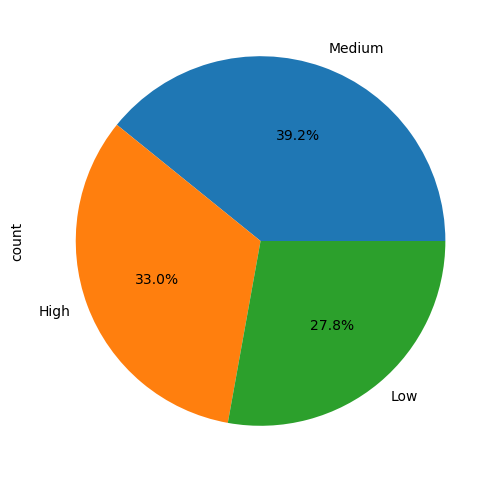

In [675]:
plt.figure(figsize=(12, 6))
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


# Ploting count plot

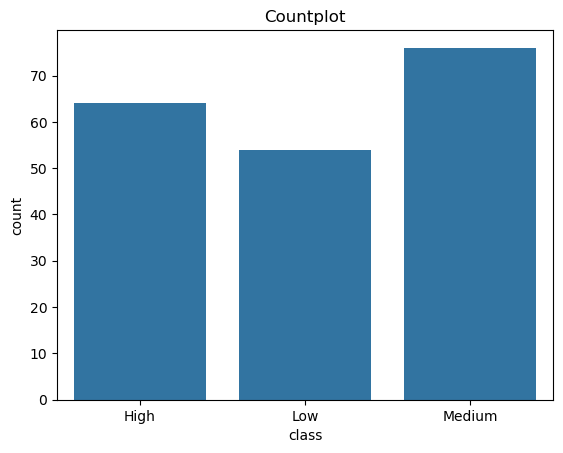

In [677]:
plt.title('Countplot')
sns.countplot(x=y);

In [678]:
# Explare 

In [679]:
col = ['alcohol_per', 'temperature', 'avg_humidity', 'fert_nitro_per', 'water_ph']

In [680]:
import warnings
warnings.filterwarnings('ignore')

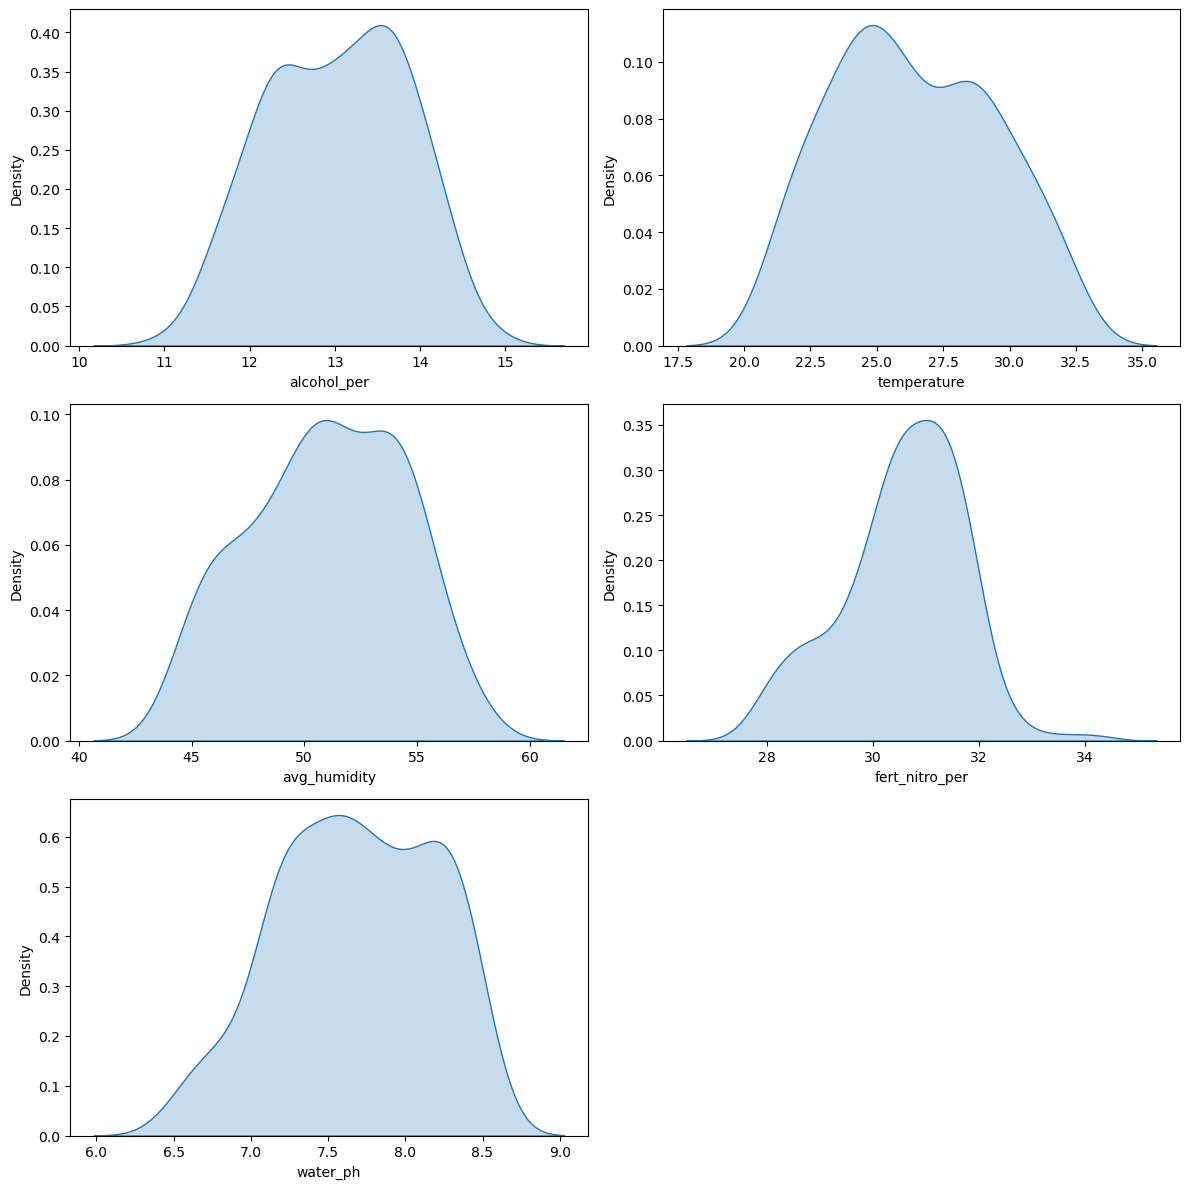

In [681]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(col, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(df[col], shade=True)
plt.tight_layout()
plt.show()

# chi square

from sklearn.feature_selection import SelectKBest, chi2

# Select top 5 features using chi²
selector = SelectKBest(score_func=chi2, k=3)
X_new = selector.fit_transform(x, y)
top_features = x.columns[selector.get_support()]
print("Top 5 features selected using chi²:", top_features)


# Encoding Data

In [683]:
cols = ['alcohol_per','alcalinity_of_ash','hue','water_o2_per','elliptical']

#  Crossvalidation

In [685]:
newdf = df.copy()

In [686]:
from sklearn.preprocessing import LabelEncoder

In [687]:
le = LabelEncoder()

In [688]:
le

LabelEncoder()

In [690]:
scaler = StandardScaler()

In [699]:
from sklearn.preprocessing import StandardScaler

# spliting data

In [702]:
from sklearn.model_selection import train_test_split

In [704]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    test_size=0.2)

In [706]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()


In [ ]:
log.fit(x_train, y_train)

In [724]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [726]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()}

In [732]:
results = []
